Let's use this notebook for some experiments. 

In [1]:
from NMF import *
%matplotlib inline

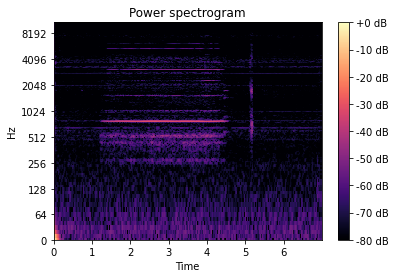

In [2]:
filename = './data/G5.wav'
ViolinRecording = Recording(filename)
ViolinSpectrogram = ViolinRecording.compute_spectrogram()
ViolinSpectrogram.visualize()
ViolinSpectrogram.restore_recording("./data/exp.wav")
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EM_IS(5, 500)
C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)


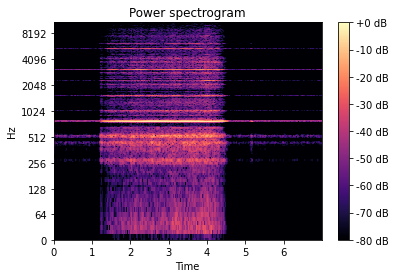

In [3]:
new_spectrogram = Spectrogram(C_matrices[4], ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")

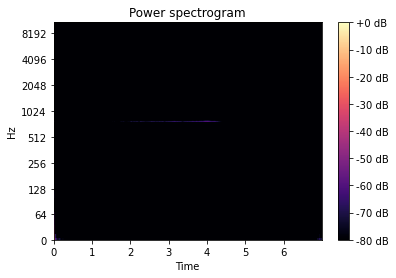

In [4]:
new_spectrogram = Spectrogram(W @ H, ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")

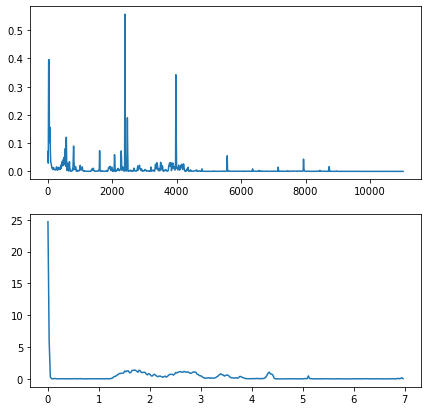

In [5]:
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(211)
ax1.plot(ViolinSpectrogram.compute_frequencies_times()[0], W[:, 1])
ax2 = fig.add_subplot(212)
ax2.plot(ViolinSpectrogram.compute_frequencies_times()[1], H[1, :])
plt.show()

In [7]:
print(get_pitches(W, ViolinSpectrogram.compute_frequencies_times()[0])[0])

[108.4  79.2  79.4  50.2  79.2]
